#                                         Face mask detector

In [4]:
import tensorflow as tf

In [5]:
from tensorflow import keras


In [6]:
import cv2,os
datapath='dataset'
categories=os.listdir(datapath)
labels=[i for i in range(len(categories))]
labels_dic=dict(zip(categories,labels))

print(categories)
print(labels)
print(labels_dic)

['with mask', 'without mask']
[0, 1]
{'with mask': 0, 'without mask': 1}


# Data preprocessing

In [7]:
image_size=100
data=[]
target=[]

for category in categories:
  folder_path=os.path.join(datapath,category)
  image_names=os.listdir(folder_path)
  
  for image_name in image_names:
    image_path=os.path.join(folder_path,image_name)
    image=cv2.imread(image_path)
    
    try:
      #first i will convert BGR image to gray scale and then will resize it to images of same size and color schema.
      gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
      resized=cv2.resize(gray,(image_size,image_size))
      #then will append into data and target.
      data.append(resized)
      target.append(labels_dic[category])
    
    except Exception as e:
      print("Exception:",e)
      #if any exception arise then exception will print

In [8]:
import numpy as np
#normalise the image by 255 so that pixel range can come in 0-1 range 
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],image_size,image_size,1))
target=np.array(target)
#convert numerical target to categorical target
from keras.utils import np_utils
target=np_utils.to_categorical(target)

# Model architecture

In [9]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout,Activation
from keras.layers import Conv2D,MaxPooling2D

model=Sequential()
model.add(Conv2D(100,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.25))

model.add(Conv2D(50,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.25))

model.add(Flatten())
model.add(Dense(50,activation='relu'))
model.add(Dropout(.40))
model.add(Dense(2,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=.1)

In [11]:
history=model.fit(train_data,train_target,epochs=15,validation_split=.2)

Epoch 1/15
31/31 [==============================] - 33s 1s/step - loss: 0.7296 - accuracy: 0.5017 - val_loss: 0.6464 - val_accuracy: 0.6169
Epoch 2/15
31/31 [==============================] - 30s 963ms/step - loss: 0.6341 - accuracy: 0.6573 - val_loss: 0.5317 - val_accuracy: 0.6815
Epoch 3/15
31/31 [==============================] - 31s 989ms/step - loss: 0.4873 - accuracy: 0.7856 - val_loss: 0.2499 - val_accuracy: 0.9194
Epoch 4/15
31/31 [==============================] - 29s 947ms/step - loss: 0.2600 - accuracy: 0.8997 - val_loss: 0.2107 - val_accuracy: 0.9113
Epoch 5/15
31/31 [==============================] - 29s 947ms/step - loss: 0.2008 - accuracy: 0.9286 - val_loss: 0.2197 - val_accuracy: 0.9032
Epoch 6/15
31/31 [==============================] - 29s 954ms/step - loss: 0.1779 - accuracy: 0.9234 - val_loss: 0.1461 - val_accuracy: 0.9194
Epoch 7/15
31/31 [==============================] - 30s 961ms/step - loss: 0.1150 - accuracy: 0.9690 - val_loss: 0.0988 - val_accuracy: 0.9637
Ep

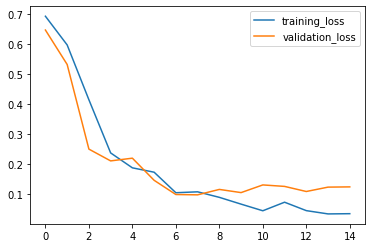

In [12]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'],label='training_loss')
plt.plot(history.history['val_loss'],label='validation_loss')
plt.xlabel=(' epochs')
plt.ylabel=('loss')
plt.legend()
plt.show()

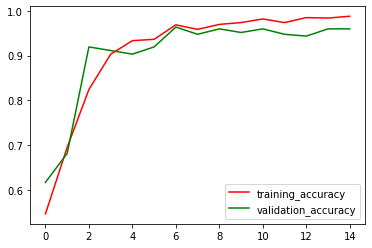

In [13]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'],'r',label='training_accuracy')
plt.plot(history.history['val_accuracy'],'g',label='validation_accuracy')
plt.xlabel=('epochs')
plt.ylabel=('accuracy')
plt.legend()
plt.show()

In [14]:
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 1s 163ms/step - loss: 0.3384 - accuracy: 0.9348
[0.33842188119888306, 0.9347826242446899]


# Detect face wearing mask or not

In [15]:
face_clsfr = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
source=cv2.VideoCapture(0)
labels_dict={0:'MASK',1:'NO MASK'}
color_dict={0:(0,255,0),1:(0,0,255)}

In [ ]:
while True:
    
    ret,img=source.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  
  
    faces=face_clsfr.detectMultiScale(gray,2,5)
    
    for x,y,w,h in faces:
        face_img=gray[y:y+h,x:x+w]
        resized=cv2.resize(face_img,(100,100))
        normalised=resized/255.0
        reshaped=np.reshape(normalised,(1,100,100,1))
        result=model.predict(reshaped)

        result=np.argmax(result,axis=1)[0]
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[result],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[result],-1)
        cv2.putText(img,labels_dict[result],(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)

        cv2.imshow('LIVE',img)
        key=cv2.waitKey(1)
    
    
  
  
    

  #27=ASCII of escape key
        if key==27:
            break
source.release()      
cv2.destroyAllWindows()        
        
      
